In [82]:
import rioxarray
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [74]:
landuse = rioxarray.open_rasterio('/mnt/d/work/小狗/30_bio_clip/30_landuse_clip.tif')
slope = rioxarray.open_rasterio('/mnt/d/work/小狗/30_bio_clip/30_slope.tif')
aspect = rioxarray.open_rasterio('/mnt/d/work/小狗/30_bio_clip/30_aspect.tif')
ele = rioxarray.open_rasterio('/mnt/d/work/小狗/30_bio_clip/30_ele_clip.tif')
bio = rioxarray.open_rasterio('/mnt/d/work/小狗/30_bio_clip/wc2.1_30s_bio_1.tif')

In [75]:
#先把tiff转nc再处理
#nc转tiff
ncfile = '/mnt/d/work/小狗/30_bio_clip/30_landuse_clip.tif'
tiffile = '/mnt/d/work/小狗/30_bio_clip/30_landuse_clip.nc'

data = rioxarray.open_rasterio(ncfile)
# 添加参考系
data.rio.write_crs("epsg:4326", inplace=True)
data.rio.to_raster(tiffile)

ERROR 1: PROJ: proj_create_from_database: /home/yqr/miniconda3/envs/area/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [83]:
landuse = xr.open_dataset('/mnt/d/work/小狗/30_bio_clip/30_landuse_clip.nc')
landuse_new = np.array(landuse.Band1)
insert_up = np.full((1,106),fill_value=np.nan)
#在开头插入nan
#lon x 经度
landuse_new = np.insert(landuse_new,0,insert_up, axis=1)

insert_off = np.full((1,104),fill_value=np.nan)
#在结尾插入nan
#lat y 纬度
landuse_new = np.append(landuse_new,insert_off, axis=0)

In [50]:
landuse = rioxarray.open_rasterio('/mnt/d/work/小狗/30_bio_clip/30_landuse_clip.tif')
#创建空数组
landuse_new = np.full((106,103),fill_value=np.nan)
for i in range(106):
    for j in range(103):
        landuse_new[i,j] = landuse[0,i,j]

insert_up = np.full((1,106),fill_value=np.nan)
#在开头插入nan
#lon x 经度
landuse_new = np.insert(landuse_new,0,insert_up, axis=1)

insert_off = np.full((1,104),fill_value=np.nan)
#在结尾插入nan
#lat y 纬度
landuse_new = np.append(landuse_new,insert_off, axis=0)
landuse_new[landuse_new==15] = np.nan

(107, 104)


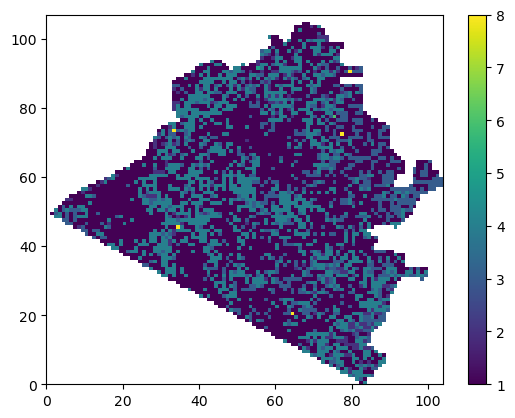

In [84]:
plt.pcolormesh(landuse_new)
plt.colorbar()
print(landuse_new.shape)

In [85]:
#导出nc
lon = np.array(slope.x)
lat = np.array(slope.y)

landuse_new = xr.DataArray(landuse_new,coords=[lat,lon],dims=['lat','lon'])
landuse_new = xr.Dataset({'landuse':landuse_new})
landuse_new.to_netcdf('/mnt/d/work/小狗/landuse_new.nc')

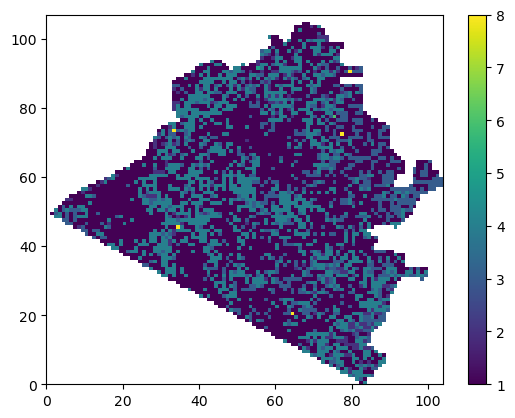

In [88]:
landuse_new2 = xr.open_dataset('/mnt/d/work/小狗/landuse_new.nc')
plt.pcolormesh(landuse_new2.landuse)
plt.colorbar()

In [89]:
#nc转tiff
ncfile = '/mnt/d/work/小狗/landuse_new.nc'
tiffile = '/mnt/d/work/小狗/landuse_new.tif'

data = rioxarray.open_rasterio(ncfile)
# 添加参考系
data.rio.write_crs("epsg:4326", inplace=True)
data.rio.to_raster(tiffile)


ERROR 1: PROJ: proj_create_from_database: /home/yqr/miniconda3/envs/area/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_create_from_name: /home/yqr/miniconda3/envs/area/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_create_from_database: /home/yqr/miniconda3/envs/area/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [91]:
import shapefile
from pandas.core.frame import DataFrame
import os

In [98]:
def shp_to_excel(shp_path,out_path):
    file = shapefile.Reader(shp_path,encoding = 'gbk')
    shapes = file.shapes()
    # <editor-fold desc="读取元数据">
    print(file.shapeType)  # 输出shp类型
    print(file.bbox)  # 输出shp的范围
    # </editor-fold>
    print(shapes[1].parts)
    print(len(shapes))  # 输出要素数量
    print(file.numRecords)  # 输出要素数量
    print(file.records())  # 输出所有属性表

    # <editor-fold desc="输出字段名称和字段类型">
    fields = file.fields
    for index in range(len(shapes)):
        geometry = shapes[index]
    file = file.records()
    data=DataFrame(file)
    data.to_excel(out_path)

for root,dirs,files in os.walk('/mnt/d/work/小狗/animals_shp'):
        for file in files:
            if os.path.join(root,file).split('\\')[-1].split('.')[-1] == 'shp':
                print(os.path.join(root,file))
                shp_path = os.path.join(root,file)
                out_path = '\mnt/d/work/小狗/animals_csv\\'+\
                os.path.join(root,file).split('\\')[-1].split('.')[0] +'.xlsx'
                shp_to_excel(shp_path,out_path)

/mnt/d/work/小狗/animals_shp/bird.shp
1
[35.06129760370898, -1.5829691499229979, 35.28521823254741, -1.1970109410388434]
[]
122
122
[Record #0: [0], Record #1: [0], Record #2: [0], Record #3: [0], Record #4: [0], Record #5: [0], Record #6: [0], Record #7: [0], Record #8: [0], Record #9: [0], Record #10: [0], Record #11: [0], Record #12: [0], Record #13: [0], Record #14: [0], Record #15: [0], Record #16: [0], Record #17: [0], Record #18: [0], Record #19: [0], Record #20: [0], Record #21: [0], Record #22: [0], Record #23: [0], Record #24: [0], Record #25: [0], Record #26: [0], Record #27: [0], Record #28: [0], Record #29: [0], Record #30: [0], Record #31: [0], Record #32: [0], Record #33: [0], Record #34: [0], Record #35: [0], Record #36: [0], Record #37: [0], Record #38: [0], Record #39: [0], Record #40: [0], Record #41: [0], Record #42: [0], Record #43: [0], Record #44: [0], Record #45: [0], Record #46: [0], Record #47: [0], Record #48: [0], Record #49: [0], Record #50: [0], Record #51: 

ModuleNotFoundError: No module named 'openpyxl'

In [1]:
import geopandas as gpd
#df_geo = gpd.read_file(shp_file)

In [3]:
import os
import pandas as pd
import shapefile
 
def read_shapefile_to_csv(shp_path, **kwargs):
    # filePath = 'I:\IPCC6\Analysis2\i_k_means_tif_toShp_eli\era\era_a81_15_eli4.shp'  # tif文件路径
    filePath = shp_path
    par_dic = kwargs
    file = shapefile.Reader(filePath)
    print(file.fields[1][0])
 
    df = pd.DataFrame()
 
    for field_factor, col in zip(file.fields[1:], range(0, len(file.fields)-1)):
        field_name = field_factor[0]
        field_series = []
 
        for i in range(file.numRecords):
            index_record = file.record(i) #row
            field_series.append(index_record[col])
 
        df[field_name] = field_series
    print(par_dic)
    if len(par_dic)>0:
        df.to_csv(par_dic["csv"])
        df_path = par_dic["csv"]
        return df, df_path
    else:
        return df
 
 
read_shapefile_to_csv('/mnt/f/小狗/animals_shp/xiniu.shp',
                          csv = os.path.join("/mnt/f/小狗/animals_csv", "rhino.csv"))

Id
{'csv': '/mnt/f/小狗/animals_csv/rhino.csv'}


(    Id    POINT_X   POINT_Y
 0    0  34.849866 -1.419953
 1    0  34.865570 -1.394255
 2    0  34.844155 -1.404249
 3    0  34.824168 -1.418525
 4    0  34.844155 -1.437085
 ..  ..        ...       ...
 62   0  35.132971 -1.357620
 63   0  35.092794 -1.341836
 64   0  35.117187 -1.340401
 65   0  35.105708 -1.357620
 66   0  35.087054 -1.356185
 
 [67 rows x 3 columns],
 '/mnt/f/小狗/animals_csv/rhino.csv')